### Задача: Собрать все данные из папки data в один датафрэйм и выполнить требуемые операции

In [ ]:
Данные:
- записываются для каждого пользователя, совершившего покупки, каждый день
- для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
- внутри каждой папки есть файл data.csv, где и хранятся данные
Схематично выглядит так:
└── data
   ├── 2020-12-30
   │  ├── FirstName_LastName1
   │  │   └── data.csv
   │  ├── FirstName_LastName2
   │  │   └── data.csv
   │  └── FirstName_LastName3
   │      └── data.csv
   └── 2020-12-31
      ├── FirstName_LastName1
      │   └── data.csv
      └── FirstName_LastName5
          └── data.csv
Задача:
Соберать все данные из папки data в один датафрэйм, имеющий следующие столбцы: 
колонки из самих файлов (product_id, quantity), имя пользователя (name), 
и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем).

### Сколько всего покупок было совершено?

In [1]:
import pandas as pd
import os

Зададим ссылку как переменную чтобы потом можно было её использовать

In [2]:
link ='../shared/homeworks/python_ds_miniprojects/4/data'
link

'../shared/homeworks/python_ds_miniprojects/4/data'

#### Решение через os.walk:
Просмотр папок и пр. операции, связанные с файлами и папками, выполняются с помощью библиотеки os.
При вложенности папок и необходимости добраться до дна можно использовать os.walk

In [3]:
os.walk('../shared/homeworks/python_ds_miniprojects/4/data')

<generator object walk at 0x7fd21c3b56d8>

In [4]:
# Выведем первую итерацию цикла присвоив ей имя x
for path, dirs, files in os.walk('../shared/homeworks/python_ds_miniprojects/4/data'):
    x = path, dirs, files
x
# Получим кортеж из полного пути, директории и имени файл на самом дне директории

('../shared/homeworks/python_ds_miniprojects/4/data/2020-12-07/Vasiliy_Ivanov',
 [],
 ['data.csv'])

In [5]:
# Смотрим что выдает os.walk по умолчанию
for path, dirs, files in os.walk('../shared/homeworks/python_ds_miniprojects/4/data'):
    print(path)

../shared/homeworks/python_ds_miniprojects/4/data
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Fedorov
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Petrov
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-08
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Petr_Petrov
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Rostislav_Petrov
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Kirill_Smirnov
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Alexey_Fedorov
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Anton_Smirn

In [6]:
# Смотрим какую длину имеет путь до самэх нижних уровней (это дальше чем до папки с датой)
len('../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/')

61

In [7]:
# Создаём список путей до ниднего уровня, отбирая соответствующие директории по длине пути
paths = []
for path, dirs, files in os.walk('../shared/homeworks/python_ds_miniprojects/4/data'):
    if len(path) > 60:
        paths.append(path)
paths

['../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Fedorov',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Petrov',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Petr_Petrov',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Rostislav_Petrov',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Kirill_Smirnov',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Alexey_Fedorov',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Anton_Smirnov',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-09/Alexey_Smirnov',
 '../shared/homeworks/python_ds_miniprojects/

In [8]:
#Смотрим содержимое файла
pd.read_csv('../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov/data.csv')

,Unnamed: 0,product_id,quantity
0,0,27,4
1,1,89,1
2,2,33,2
3,3,8,3
4,4,16,1


In [9]:
# Поверяем альтернативный способ извлекать содержимое для применения его в цикле
pd.read_csv(paths[0] + '/data.csv')

,Unnamed: 0,product_id,quantity
0,0,27,4
1,1,89,1
2,2,33,2
3,3,8,3
4,4,16,1


In [10]:
len(paths)

44

In [11]:
data = []
df_name_date = pd.DataFrame(data)
for i in range(len(paths)):
    x = pd.read_csv(paths[i] + '/data.csv', index_col=0) # из директорий, найденныех ранее при помощи os.walk извлекаем содержимое csv файла
    x['name'] = paths[i].split('/')[7] # добавляем в df х столбец, где название директории бьём на названия папок отделенных '/' и добавляем поле с именем (оно 7-е в списке папок)
    x['date'] = paths[i].split('/')[6] # то же, что и выше, теперь проделываем с датой и папкой дат
    df_name_date = df_name_date.append(x) # складываем в один ДФ все выгружаемые циклом данные
 
df_name_date.reset_index(drop=True) # используем метод reset_index. Чтобы старый индекс не стал колонкой, а просто ушёл, указываем параметр drop=True


,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
156,18,4,Petr_Fedorov,2020-12-07
157,94,4,Petr_Fedorov,2020-12-07
158,95,2,Vasiliy_Ivanov,2020-12-07
159,83,3,Vasiliy_Ivanov,2020-12-07


### Натйи итого покупок

In [12]:
df_name_date.quantity.sum()

480

In [13]:
#  Какой пользователь купил больше всего товаров?

In [14]:
df_name_data_g = df_name_date.groupby('name', as_index = False)\
.agg({'quantity': 'sum'})\
.sort_values('quantity', ascending = False)
df_name_data_g

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


### Найти топ-10 товаров по числу проданных единиц за всё время и построить барплот (столбчатую диаграмму, sns.barplot)

In [15]:
df_name_date

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
0,18,4,Petr_Fedorov,2020-12-07
1,94,4,Petr_Fedorov,2020-12-07
0,95,2,Vasiliy_Ivanov,2020-12-07
1,83,3,Vasiliy_Ivanov,2020-12-07


In [16]:
df_name_date.shape

(161, 4)

In [17]:
df_name_date.isnull().sum()

product_id    0
quantity      0
name          0
date          0
dtype: int64

In [18]:
df_top_10 = df_name_date.groupby('product_id', as_index = False)\
.agg({'quantity':'sum'})\
.sort_values('quantity', ascending = False)\
.nlargest(10,'quantity')
df_top_10

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

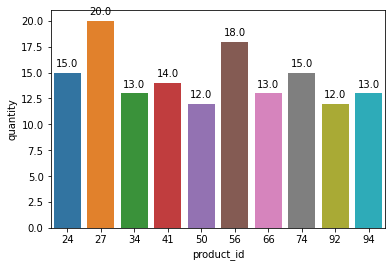

In [20]:
ax = sns.barplot(data = df_top_10, x = 'product_id', y = 'quantity')
#дальше делаем подписи для баров 
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
#plt.xlabel("quantity", size=14) - так менять подписи осей

### Построить продажи по дням

In [21]:
df_name_date.dtypes

product_id     int64
quantity       int64
name          object
date          object
dtype: object

In [22]:
# Конвертируем столбец с датой из object в datetime64
df_name_date['date'] = pd.to_datetime(df_name_date['date'])

In [23]:
df_name_date.dtypes

product_id             int64
quantity               int64
name                  object
date          datetime64[ns]
dtype: object

In [24]:
# Извлекаем день
df_name_date['day'] = df_name_date['date'].dt.day 
df_name_date.day

0    5
1    5
2    5
3    5
4    5
    ..
0    7
1    7
0    7
1    7
2    7
Name: day, Length: 161, dtype: int64

In [25]:
df_dayly_sales = df_name_date.groupby('day', as_index = False)\
.agg({'quantity': 'sum'})
df_dayly_sales

,day,quantity
0,3,60
1,4,113
2,5,61
3,6,15
4,7,94
5,8,68
6,9,69


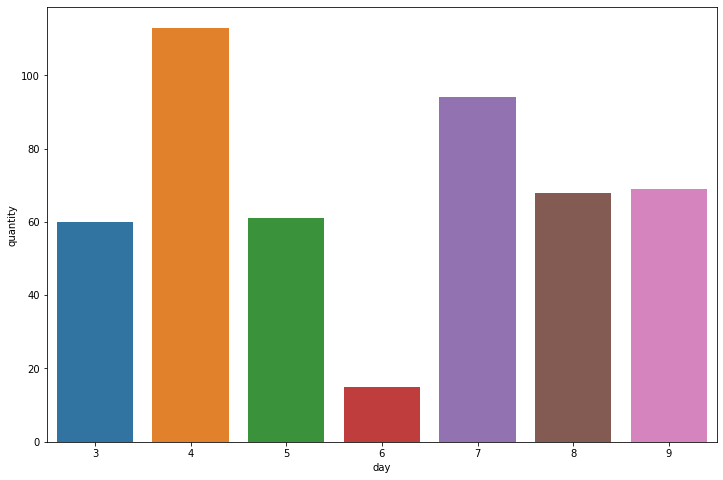

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(data = df_dayly_sales, x = 'day', y = 'quantity')

In [27]:
df_name_date['date'] = pd.to_datetime(df_name_date['date'], dayfirst=True)

### Найти повторные покупки

#### 1 способ: найдем через drop_duplicates, группировку и фильтрацию

In [28]:
# Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
# Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [32]:
df_name_date

,product_id,quantity,name,date,day
0,27,4,Petr_Ivanov,2020-12-05,5
1,89,1,Petr_Ivanov,2020-12-05,5
2,33,2,Petr_Ivanov,2020-12-05,5
3,8,3,Petr_Ivanov,2020-12-05,5
4,16,1,Petr_Ivanov,2020-12-05,5
...,...,...,...,...,...
0,18,4,Petr_Fedorov,2020-12-07,7
1,94,4,Petr_Fedorov,2020-12-07,7
0,95,2,Vasiliy_Ivanov,2020-12-07,7
1,83,3,Vasiliy_Ivanov,2020-12-07,7


In [53]:
# Удаляем дубликаты
df_name_date_dd = df_name_date.drop_duplicates(subset=['product_id', 'name', 'date'])

In [54]:
# Группируем по имени и продукту чтобы найти покупки одинх продуктов теми же покупателями но в разные дни и считаем их
df_test = df_name_date_dd.groupby(['name', 'product_id'], as_index = False).agg({'date':'count'})
df_test

,name,product_id,date
0,Alexey_Fedorov,13,1
1,Alexey_Fedorov,15,1
2,Alexey_Fedorov,18,1
3,Alexey_Fedorov,34,1
4,Alexey_Fedorov,50,1
...,...,...,...
153,Vasiliy_Ivanov,83,1
154,Vasiliy_Ivanov,94,1
155,Vasiliy_Ivanov,95,1
156,Vasiliy_Petrov,27,1


In [55]:
# Находим дубли
df_test.query("date > 1")

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2


#### 2 способ: найдем через duplicated

In [33]:
# Удаляем дубликаты по 3 полям
df_name_date_dd = df_name_date.drop_duplicates(subset=['product_id', 'name', 'date'])

,product_id,quantity,name,date,day
0,27,4,Petr_Ivanov,2020-12-05,5
1,89,1,Petr_Ivanov,2020-12-05,5
2,33,2,Petr_Ivanov,2020-12-05,5
3,8,3,Petr_Ivanov,2020-12-05,5
4,16,1,Petr_Ivanov,2020-12-05,5
...,...,...,...,...,...
0,18,4,Petr_Fedorov,2020-12-07,7
1,94,4,Petr_Fedorov,2020-12-07,7
0,95,2,Vasiliy_Ivanov,2020-12-07,7
1,83,3,Vasiliy_Ivanov,2020-12-07,7


In [59]:
# Ищем в оставшихся записях (без дублей по покупателю, товару и дате) дубли по покупателю и товару в разные даты
df_name_date_dd[df_name_date_dd.duplicated(['product_id', 'name'])]

,product_id,quantity,name,date,day
0,15,4,Anton_Ivanov,2020-12-07,7
1,94,4,Petr_Fedorov,2020-12-07,7


### Extra задание. Merge

In [ ]:
# извлечь из таблицы записи с ИНН, указанными в текстовом файле
# записать результат в файл selected_inn.csv
# в качестве проверки укажите сумму колонки income,RUB в отобранных данных.

In [60]:
import pandas as pd

In [61]:
dt_1 = pd.read_excel('4_inn.xls')
dt_1

,Unnamed: 0,#,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
0,0,0,"ЗАО «Власова, Макаров и Шашков»",1143692580560,"д. Кирово-Чепецк, пр. Металлургов, д. 537 к. 3...",Жданов Карл Виленович,Маммолог,109092209811,+7 (559) 338-87-76,bogdanovavtonom@yahoo.com,ooo.info,2015-01-07,2006-10-04,21112877268,73423615032,Ulan-Ude,"к. Тосно, ул. Пушкинская, д. 896, 617222",Синхронизация критически важных отношений,54875526078,32205872896
1,1,1,"РАО «Тимофеева, Алексеева и Кузнецова»",9342309660697,"г. Арзамас, наб. Фестивальная, д. 7 стр. 8/2, ...",Рожков Харлампий Алексеевич,Воспитатель,704229465069,8 (632) 620-8879,safonovantonin@rao.org,ooo.net,1990-05-16,2019-01-18,18393547520,19072454279,Tyoply Stan,"ст. Кяхта, бул. Нефтяников, д. 24, 768742",Формирование заказных методик,33876448811,47437574301
2,2,2,РАО «Юдин-Ефимова»,1277485323451,"п. Меренга, алл. Достоевского, д. 3/4 к. 497, ...",Филимон Фадеевич Дьячков,Автослесарь,267655036377,+74925330378,kdorofeev@npo.ru,ao.com,1982-11-04,1986-06-19,56104355836,18629292792,Danilov,"клх Усолье Сибирское, алл. Шишкина, д. 3/9 к. ...",Максимизация корпоративных метрик,94073834991,7701710065
3,3,3,Доронин Инкорпорэйтед,7139161431511,"д. Иваново, ул. Красных Партизан, д. 83 к. 4, ...",Крылов Глеб Якубович,Тюремный надзиратель,362024991175,+7 118 643 21 48,nkulakova@mail.ru,ooo.ru,2005-01-02,2004-04-06,10398489351,32502585383,Beryozovsky,"г. Заводоуковск, ул. Гражданская, д. 7 к. 8/5,...",Разработка ориентированных на пользователя инт...,86971505490,61148002572
4,4,4,Объединенная энергетическая компания,6114798049639,"к. Энгельс, наб. Шишкина, д. 120, 823828",Субботин Вячеслав Федотович,Инженер-электрик,257948948010,8 642 249 2134,evgraf_18@yahoo.com,gerasimova.biz,1983-07-02,1992-06-20,20074507047,40083207999,Bavly,"к. Соль-Илецк, пер. Пригородный, д. 804 к. 1/3...",Монетизация интуитивных веб-сервисов,36351136214,34861533393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,2105,2105,"ИП «Зайцев, Шубин и Дементьева»",6580539599719,"к. Чебаркуль, бул. Кольцевой, д. 19 к. 3, 911953",Назар Гордеевич Миронов,Дефектолог,575321775842,8 (390) 976-88-54,juvenali_66@ao.edu,aviakompanija.edu,2007-02-01,2014-10-29,13383530491,62100202894,Gudermes,"г. Миасс, пр. Пожарского, д. 39 стр. 880, 386211",Охват прозрачных методик,88659854892,61232741869
2106,2106,2106,Юдина Лтд,5012825137426,"д. Темрюк, ш. Автомобилистов, д. 9 стр. 59, 80...",Игнатов Кирилл Арсенович,Прозектор,703895742672,+7 854 489 5577,gavrila_2019@gmail.com,npo.net,1973-08-13,2001-11-09,40544984216,35386922447,Tver,"к. Мыс Шмидта, алл. Комарова, д. 257 стр. 3, 8...",Увеличение кроссплатформенных действий,20441750025,67450329265
2107,2107,2107,Антонова Лимитед,7659150538516,"г. Ноябрьск, пр. Весенний, д. 418, 214696",Александров Радим Ярославович,Дознаватель,576824176737,+7 (135) 034-6805,chernovlongin@rambler.ru,krilov.net,2018-11-03,2016-06-15,39266483828,21174514029,Sharypovo,"с. Щелково, алл. Попова, д. 143 к. 811, 155684",Мотивация сенсационных решений,9278989412,77350481806
2108,2108,2108,ООО «Хохлов Казаков»,9506828156265,"к. Липецк, наб. Халтурина, д. 60, 449290",Воробьев Сидор Фролович,Снайпер,157426408379,+7 172 548 4422,qpanova@hotmail.com,oao.org,1980-07-02,2009-11-23,76945273610,95601014531,Privolzhskiy,"п. Токма, ш. 50 лет Победы, д. 730, 791941",Охват серверных результатов,84921082372,85023560472


In [3]:
dt_2 = pd.read_csv('4_necessary_inn.txt', header=None)
dt_2.columns= ['head_inn']
dt_2

,head_inn
0,394609645484
1,281578625230
2,923769811917
3,998694734508
4,271011690615
...,...
110,664306216794
111,991951385204
112,129413497752
113,447901012904


In [4]:
dt_merge = dt_1.merge(dt_2, how = 'inner', on = 'head_inn')
dt_merge = dt_merge.rename(columns ={'income,RUB': 'income_RUB'})
dt_merge.head(5)

,Unnamed: 0,#,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB",income_RUB
0,47,47,Пермэнергосбыт,6417532956774,"ст. Слюдянка, пер. Брянский, д. 378 стр. 634, ...",Емельян Феликсович Зайцев,Релайтер,175482780898,8 833 729 83 14,boleslav28@gmail.com,krilova.net,1986-03-20,1998-02-11,47158105405,10234283083,Novosilikatnyy,"г. Кропоткин (Краснод.), пр. Лесный, д. 8/3 к....",Разработка подробных результатов,44637351562,67534335517
1,76,76,ЗАО «Кабанова Ковалев»,9343329412518,"с. Нарткала, ул. Верхняя, д. 68 стр. 1, 393309",Геннадий Денисович Григорьев,Бондарь,120708914823,+7 455 632 1053,kapustinjulian@oao.com,ao.ru,2011-09-28,1983-11-10,20653722407,92544205998,Severodvinsk,"д. Москва, МГУ, бул. Транспортный, д. 75 стр. ...",Монетизация передовых действий,78570288945,19932336080
2,77,77,Неофарм,3813743111150,"г. Долинск, ш. Московское, д. 25 к. 5, 227970",Юрий Архипович Богданов,Полицейский,663119569897,+7 077 854 47 31,bazhen41@matveeva.net,ao.com,2019-01-30,1986-09-01,96067740308,47030638090,Kovylkino,"с. Сладково, наб. Вавилова, д. 62 к. 627, 198606",Эксплуатация круглосуточных пользователей,30634104861,3103853229
3,85,85,Арконик СМЗ,7465966885549,"п. Тобольск, ул. Лунная, д. 375 стр. 724, 119588",Аникей Артёмович Павлов,Оперативный работник,722903871682,8 120 448 48 45,emeljan_75@gmail.com,ao.com,2004-08-10,2012-04-01,79166677871,45647356291,Otradnyy,"клх Миасс, пер. Тургенева, д. 4/2 к. 8, 505443",Использование серверных диапазонов,85286893329,8607813826
4,90,90,Фармперспектива,6205521489390,"к. Горно-Алтайск, ул. Степана Разина, д. 646 с...",Шашков Алексей Богданович,Фортификатор,837771137752,88711723244,ustinovaoksana@gmail.com,npo.biz,1982-05-29,1981-10-10,13185275127,67033649508,Ishim,"клх Кунгур, ш. Запрудное, д. 13, 038583",Максимизация мультимедийных интерфейсов,88304638400,29181260019


In [36]:
x = dt_merge.income_RUB.sum()

In [37]:
x

6104522627393

In [7]:
os.getcwd()

'/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-v-40/Lesson_4'